In [1]:
import csv
import pandas as pd
import sys

**Negative and Positive Cohort**

Psotive and Negative cohort. 1 to 1 ratio (50% positive and 50% negative)

Basically, create a new file that contains patients who were diagnosed with diabetes and other specific 
diseases listed in diseases list.

@Input file: indexed data excludes procedures. All patients in this file are diabetics <br/>
@Output file:  a new file that contains patients who developed certain disease after 4 visits

In addition, this file also keeps track of patients IDS who are positive, such that we can take
negative patients by making sure the ID is not in the list of patients who tested positive
<hr/>
First, create two seperate files for positive and negative, then, take all positive patients and the same number from the negative patients

In [61]:
# D_311 - #~60k - index: 72 - Dipressive disorders
#  D_413 - Xk - index: 107 - ANGINA PECTORIS
diseases = ["107"]
diseases_count = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
patient_ids_with_positive_cohort = []
output_file = 'HCUP_indexed_positive_d_413.csv'

csv_positive_cohort = open(output_file, mode='w')

file = 'HCUP_indexed_ex_procedures.csv'
with open(file) as csv_file:
    for line in csv_file:    
        row = line.split(',')

        for x in range(0, len(row)):
            
            if row[x] == '3': # 3 -> diabetes/D_250
                i = x
                data = row[i:] 
                # print(data)
                c = 0
                for i in range(0, len(data)):
                    if '#' in data[i]:
                        c+=1
                    if c == 4:
                        data_2 = data[:i]
                        data_3 = data[i:]
                        for j in range(len(diseases)):
                            for x in data_3:
                                
                                if '#' in x: x = x.split('#')[0]
                                
                                if diseases[j] == x:
                                    
                                    flag = False
                                    for y in data_2:
                                        if diseases[j] == y:
                                            flag = True
                                            break
                                    if not flag:
                                        diseases_count[j] += 1
                                        csv_positive_cohort.write(line) 
                                        patient_id = line.split('|')[0]
                                        patient_ids_with_positive_cohort.append(patient_id) # to keep track
                                        break        
                                    
                        break
                break

        
csv_positive_cohort.close()
print(diseases_count)

[21616, 0, 0, 0, 0, 0, 0, 0, 0, 0]


Now, we have a dataset that contains all positive patients. 
Lets create a file with patients/diabetics who do not have specific disease (negative/0)

In [62]:
# Get negative cohort for med_code: D_413/index: 107
out_file = 'HCUP_indexed_negative_d_413.csv'
negative_cohort_file = open(out_file, mode='w')


with open(file, mode='r') as input_file:
    for row in input_file:
        patient_id = row.split('|')[0]
        # if patient id is not in the list of positive, then negative
        if patient_id not in patient_ids_with_positive_cohort: 
            negative_cohort_file.write(row)

negative_cohort_file.close()
print("done")

done


Test and count how many negative and positive patients there are 
take all positive patients and same number of patients from negative

In [63]:
# Test data-set
file = 'HCUP_indexed_positive_d_413.csv'
counter = 0
with open(file) as test_data:
    for row in test_data:
        counter+=1
print(counter)

# Test data-set
file = 'HCUP_indexed_negative_d_413.csv'
counter = 0
with open(file) as test_data:
    for row in test_data:
        #print(row)
        counter+=1
print(counter)

21616
1886983


Now, we have two different datasets. Positive and negative patients

Create a new file that contains 1 to 1 ratio - 50/50 balanced data

In [64]:
# 1 to 1 ratio - 50/50 - balanced data
file = 'HCUP_D_413_1_to_1.csv'
new_csv = open(file, mode='w')
input_file = 'HCUP_indexed_positive_d_413.csv'

counter = 0
with open(input_file, mode='r') as data:
    for row in data:
        counter += 1
        new_csv.write(row)
new_csv.close()
print('rows written', counter)
# first 21631 are positive

rows written 21616


In [65]:
# 1 to 1 ratio - 50/50 - balanced data
file = 'HCUP_D_413_1_to_1.csv'
new_csv = open(file, mode='a')
input_file = 'HCUP_indexed_negative_d_413.csv'

counter = 0
with open(input_file, mode='r') as data:
    for row in data:
        if counter == 21616: break
        counter += 1
        new_csv.write(row)
new_csv.close()
# second 21631 are negative
print('rows written', counter)

rows written 21616


Test and count total number - should be 21631*2 = 43262

In [66]:
# Test data-set
file = 'HCUP_D_413_1_to_1.csv'
counter = 0
with open(file) as test_data:
    for row in test_data:
        # print(row)
        counter+=1
print(counter)

43232


<hr/>
<hr/>
<hr/>
<hr/>
<hr/>

Load med codes

In [67]:
codes_d = {}
file = 'disease_codes.csv'
with open(file) as input_data:
    for code in input_data:
        index = code.split(',')[0][2:-1]
        code = code.split(',')[1][1:-2]
        
        codes_d[code] = index

In [68]:
# lets take a look into the dict
print(len(codes_d))
for k, v in codes_d.items():
    print(k, '-->', v)


2399
1 --> D_402
2 --> D_424
3 --> D_250
4 --> D_416
5 --> D_428
6 --> D_852
7 --> D_276
8 --> D_782
9 --> D_401
10 --> D_780
11 --> D_285
12 --> D_518
13 --> D_507
14 --> D_038
15 --> D_995
16 --> D_907
17 --> D_458
18 --> D_692
19 --> D_263
20 --> D_438
21 --> D_787
22 --> D_482
23 --> D_584
24 --> D_599
25 --> D_008
26 --> D_799
27 --> D_560
28 --> D_486
29 --> D_578
30 --> D_427
31 --> D_553
32 --> D_262
33 --> D_041
34 --> D_997
35 --> D_585
36 --> D_403
37 --> D_536
38 --> D_294
39 --> D_151
40 --> D_682
41 --> D_272
42 --> D_354
43 --> D_357
44 --> D_278
45 --> D_681
46 --> D_362
47 --> D_707
48 --> D_327
49 --> D_425
50 --> D_786
51 --> D_491
52 --> D_571
53 --> D_456
54 --> D_572
55 --> D_303
56 --> D_453
57 --> D_280
58 --> D_496
59 --> D_300
60 --> D_296
61 --> D_501
62 --> D_185
63 --> D_515
64 --> D_305
65 --> D_789
66 --> D_600
67 --> D_595
68 --> D_530
69 --> D_591
70 --> D_287
71 --> D_441
72 --> D_311
73 --> D_433
74 --> D_356
75 --> D_255
76 --> D_426
77 --> D_412
78 

643 --> D_023
644 --> D_397
645 --> D_243
646 --> D_517
647 --> D_902
648 --> D_918
649 --> D_352
650 --> D_485
651 --> D_713
652 --> D_005
653 --> D_442
654 --> D_031
655 --> D_538
656 --> D_726
657 --> D_703
658 --> D_628
659 --> D_386
660 --> D_866
661 --> D_831
662 --> D_306
663 --> D_040
664 --> D_516
665 --> D_422
666 --> D_877
667 --> D_986
668 --> D_506
669 --> D_945
670 --> D_055
671 --> D_058
672 --> D_885
673 --> D_363
674 --> D_367
675 --> D_394
676 --> D_942
677 --> D_943
678 --> D_906
679 --> D_903
680 --> D_090
681 --> D_720
682 --> D_118
683 --> D_313
684 --> D_052
685 --> D_700
686 --> D_938
687 --> D_826
688 --> D_926
689 --> D_158
690 --> D_385
691 --> D_452
692 --> D_931
693 --> D_066
694 --> D_815
695 --> D_084
696 --> D_370
697 --> D_364
698 --> D_946
699 --> D_098
700 --> D_964
701 --> D_325
702 --> D_838
703 --> D_448
704 --> D_835
705 --> D_833
706 --> D_811
707 --> D_900
708 --> D_150
709 --> D_240
710 --> D_154
711 --> D_803
712 --> D_939
713 --> D_842
714 --

5281 --> D_V037
5282 --> D_V606
5283 --> D_V759
5284 --> D_V109
5285 --> D_V582
5286 --> D_V063
5287 --> D_V890
5288 --> D_V688
5289 --> D_V738
5290 --> D_V571
5291 --> D_V110
5292 --> D_V111
5293 --> D_V580
5294 --> D_V054
5295 --> D_V776
5296 --> D_V765
5297 --> D_V360
5298 --> D_V221
5299 --> D_V421
5300 --> D_V330
5301 --> D_V321
5302 --> D_V047
5303 --> D_V596
5304 --> D_V177
5305 --> D_V617
5306 --> D_V760
5307 --> D_V638
5308 --> D_V670
5309 --> D_V474
5310 --> D_V712
5311 --> D_V664
5312 --> D_V728
5313 --> D_V660
5314 --> D_V549
5315 --> D_V134
5316 --> D_V159
5317 --> D_V423
5318 --> D_V724
5319 --> D_V119
5320 --> D_V190
5321 --> D_V121
5322 --> D_V289
5323 --> D_V561
5324 --> D_V034
5325 --> D_V060
5326 --> D_V194
5327 --> D_V426
5328 --> D_V032
5329 --> D_V133
5330 --> D_V184
5331 --> D_V590
5332 --> D_V162
5333 --> D_V594
5334 --> D_V631
5335 --> D_V562
5336 --> D_V191
5337 --> D_V434
5338 --> D_V187
5339 --> D_V698
5340 --> D_V534
5341 --> D_V840
5342 --> D_V075
5343 -->

10389 --> P_274
10390 --> P_555
10391 --> P_653
10392 --> P_659
10393 --> P_320
10394 --> P_863
10395 --> P_355
10396 --> P_457
10397 --> P_644
10398 --> P_491
10399 --> P_086
10400 --> P_760
10401 --> P_974
10402 --> P_346
10403 --> P_085
10404 --> P_458
10405 --> P_779
10406 --> P_839
10407 --> P_205
10408 --> P_186
10409 --> P_129
10410 --> P_137
10411 --> P_568
10412 --> P_932
10413 --> P_098
10414 --> P_295
10415 --> P_225
10416 --> P_240
10417 --> P_934
10418 --> P_072
10419 --> P_428
10420 --> P_348
10421 --> P_642
10422 --> P_951
10423 --> P_583
10424 --> P_564
10425 --> P_554
10426 --> P_219
10427 --> P_243
10428 --> P_213
10429 --> P_382
10430 --> P_339
10431 --> P_229
10432 --> P_248
10433 --> P_892
10434 --> P_264
10435 --> P_509
10436 --> P_464
10437 --> P_691
10438 --> P_667
10439 --> P_813
10440 --> P_315
10441 --> P_080
10442 --> P_449
10443 --> P_438
10444 --> P_255
10445 --> P_566
10446 --> P_247
10447 --> P_231
10448 --> P_037
10449 --> P_404
10450 --> P_657
10451 --

In [69]:
# count how many times a code occur per patient
file = 'HCUP_D_413_1_to_1.csv'
counter = 0

code_count = {}

patient_index = 1
with open(file) as test_data:
    for row in test_data:
        visits = row.replace('\n','').split('|')[2].split('#')
        for k in range(0,len(visits)):
            visit_codes = visits[k].split(',')[1:]
            # print(visit_codes)
            for v in visit_codes:
                code_count[v] = code_count.get(v, 0) + 1
   

In [70]:
# Delete those medical codes from dataset 
keys_to_delete = []
counter = 0
for k, v in code_count.items():
     if v < 50 or v > 200000:
        counter += 1
        keys_to_delete.append(k)
        
print(counter)
# delete those codes from data-set 

490


In [71]:
# new medical codes is a dict that exludes codes that we wanted to delete
counter = 0
new_med_codes = {}
for k, v in codes_d.items():
    if k in keys_to_delete:
        continue
    new_med_codes[k] = v

In [72]:
# delete procedures from new_med_codes
med_codes_without_procedures = {}
for k, v in new_med_codes.items():
    if v.startswith("P_"):
        continue
    med_codes_without_procedures[k] = v

In [73]:
# Create a new medical codes file - Code and its index
import operator

codes_file = open('disease_codes_v2.csv', 'w')

for k, v in med_codes_without_procedures.items():
    codes_file.write('(\'' + v + '\', ' + k + ")\n")
codes_file.close() 

In [74]:
# create a new file that excludes medical codes to delete
new_file = 'HCUP_D_413_1_to_1_v2.csv'

new_csv = open(new_file, mode='w')

file = 'HCUP_D_413_1_to_1.csv'

with open(file) as input_file:
    for line in input_file:
        front = line.replace('\n', '').split('|')[:2]
        visits = line.replace('\n','').split('|')[2].split('#')
        new_visits = []
        
        for visit in visits:
            link_and_age = visit.split(',')[:2]
            med_codes = visit.split(',')[2:]
            new_codes = []
            
            for med_code in med_codes:
                # med_code is not '-99' and
                 if med_code in med_codes_without_procedures:
                    new_codes.append(str(med_code))
            new_visits.append(','.join(link_and_age + new_codes))
        new_csv.write('|'.join(front) + '|' + '#'.join(new_visits) + '\n')
new_csv.close()

In [75]:
# Test data-set
file = 'HCUP_D_413_1_to_1_v2.csv'
counter = 0
with open(file) as test_data:
    for row in test_data:
        # print(row)
        counter+=1
print(counter)

43232


<hr/>
<hr/>
<hr/>
<hr/>
<hr/>

**MAKE AMENDMENT**

For those patients who were tested positive, remove visits after that contain the certain complication we are looking for and after
and for those who were tested negative, leave the length as it is

In [76]:
# Cut positive patients such that we only have the row from 0 until we find the medical code of the required complication 

file = 'HCUP_D_413_1_to_1_v2.csv'
out_file = 'HCUP_D_413_1_to_1_v3.csv'
new_csv = open(out_file, mode = 'w')
counter = 0

with open(file, mode='r') as csv_file:
    for line in csv_file:
        if counter < 32787:
            counter += 1
            front = line.replace('\n', '').split('|')[:2]
            visits = line.replace('\n','').split('|')[2].split('#')

            index = 0
            for v in visits:
                index+=1
                if '107' in v:
                    new_csv.write('|'.join(front) + '|' + '#'.join(visits[0:index-1]) + '\n')
                    break
        else:
            new_csv.write(line) 
new_csv.close()

In [77]:
# Test data-set
file = 'HCUP_D_413_1_to_1_v3.csv'
counter = 0
with open(file) as test_data:
    for row in test_data:
        # print(row)
        counter+=1
print(counter)

33059


In [78]:
# Checks avg number of visits per patients for positive and negative class to make sure we are not biased

file = 'HCUP_D_413_1_to_1_v3.csv'

avg_len_pos = 0
avg_len_neg = 0

counter = 0
with open(file, mode='r') as csv_file:
    for line in csv_file:
        if counter < 21616:
            avg_len_pos += line.count("#")
        else:
            avg_len_neg += line.count("#")
        counter += 1
print(avg_len_pos / 21616)
print(avg_len_neg / 21616)
        

5.643921169504071
2.8552923760177644


In [79]:
###### added in ###### Wilson
days = []
count = 0
with open('HCUP_D_413_1_to_1_v3.csv') as csv_file:
    for line in csv_file:
        visits = line.replace('\n','').split('|')[2].split('#')
        #print(visits)
        if visits[0].split(',')[0] != '':
            initialDate = int(visits[0].split(',')[0])
        else:
            days.append(0)
            continue
        for visit in visits:
            currentDate = int(visit.split(',')[0])
            if currentDate < initialDate:
                days.append(-1)
                continue
            days.append(int(visit.split(',')[0]) - initialDate)

In [80]:
# creates matrix where rows are visits containing all the diseases padded with zeros

list_of_visits = []

indexed_data = 'HCUP_D_413_1_to_1_v3.csv'
with open(indexed_data) as input_data:
    cnt_visits = 0
    seen = set()
    index = 0
    for row in input_data:
        visits = row.replace('\n','').split('|')[2].split('#')
        for visit in visits:
            cnt_visits += 1
            v = list(map(int, visit.split(',')[2:]))
            v.sort()
            v.extend([0] * (26 - len(v)))
            v = tuple(v)
            if v not in seen:
                seen.add(v)
                index += 1
                
    list_of_visits = [list(x) for x in seen]
    print(list_of_visits[:5])

[[7, 11, 33, 33, 35, 36, 41, 43, 47, 64, 108, 117, 131, 158, 449, 5012, 5012, 5013, 5076, 0, 0, 0, 0, 0, 0, 0], [10, 41, 50, 68, 72, 81, 5018, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [7, 26, 28, 43, 44, 46, 151, 151, 419, 5018, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [4, 41, 46, 57, 88, 171, 256, 320, 644, 5013, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [7, 10, 60, 90, 100, 572, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]


In [81]:
# load medical codes
codes_d = {}
file = 'disease_codes_v2.csv'
with open(file) as input_data:
    index = 0
    for code in input_data:
        code = code.split(',')[1][1:-2]
        codes_d[code] = index
        index +=1 
#print(codes_d)

In [82]:
# create Frequency Matrix
# creates matrix where rows are visits and columns are diseases codes and values are frequnces for each disease in each visit
freq_matrix = []
for i in range(len(list_of_visits)):
    freq_matrix.append([0] * 1023)

for i in range(len(list_of_visits)):
    for j in range(len(list_of_visits[0])):
        if list_of_visits[i][j] != 0:
            k = codes_d[str(list_of_visits[i][j])]
            freq_matrix[i][k] += 1

In [83]:
# runs SVD on freq_matrix
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=50)
visits_emb = svd.fit_transform(freq_matrix)
print(len(visits_emb), len(visits_emb[0]))

201828 50


In [84]:
# patients visits
patients_visits = []

indexed_data = 'HCUP_D_413_1_to_1_v3.csv'
with open(indexed_data) as input_data:
    for row in input_data:
        v_codes = []
        visits = row.replace('\n','').split('|')[2].split('#')
        for visit in visits:
            v = list(map(int, visit.split(',')[2:]))
            v.sort()
            v.extend([0] * (26 - len(v)))
            v_codes.append(list_of_visits.index(v))
        patients_visits.append(v_codes)

print(len(patients_visits), len(patients_visits[2]))

33059 33


In [85]:
# change a matrix which rows are patients and col contains concatenated feature vectors of that patients visits
rnn_input = []
for i in range(43232):    # 43262
    rnn_input.append([0] * 2500)
    
for i in range(len(patients_visits)):
    for j in range(len(patients_visits[i])):
        rnn_input[i][50 * j: 50 * (j + 1)] = visits_emb[patients_visits[i][j]]

In [86]:
###### added in ###### Wilson
count = 0
for i in range(len(rnn_input)): #for each patient
    for j in range(49, len(rnn_input[i]), 50): #replace every 50th component
        if rnn_input[i][j] == 0:
            count += 1
            break
        rnn_input[i][j] = float(days.pop(0))

MAKE SURE LENGTH OF ALL ROWS ARE 2500

In [87]:
# write rnn_input to csv file
file = 'HCUP_rnn_input.csv'

with open(file, "w", newline="") as new_csv_file:
    writer = csv.writer(new_csv_file)
    for row in rnn_input:
        writer.writerow(row)

In [88]:
# Take a peak into the new written file for testing purposes
file = 'HCUP_rnn_input.csv'

with open(file) as new_csv_file:
    for line in new_csv_file:
        data = line.split(',')
        print((line))        
        break

1.1467446172313593,-0.027480943003796176,-0.9094051997859905,-0.20392088240758768,-0.3255839521797771,0.7022896050758523,-0.24527826453880666,-0.17000546460271548,0.08022639200448142,0.0116428411501064,-0.35279035663794045,-0.4466982756934042,0.5619113507197039,0.18552470755661796,-0.5020970964284371,0.08938469970820365,-0.1286491830201476,-0.2766661897008691,-0.23588403414335446,-0.047671842529829464,-0.18110863011117068,-0.036241729080314554,0.013300232513392261,0.23147679588438244,-0.05900961710654677,-0.3942395392239761,-0.03277797939435875,0.026900454469299753,-0.007989994845458802,-0.237484992091245,-0.03415556786102293,-0.14741591759221265,-0.03162748662737773,-0.18541497810700705,0.02305372316616396,-0.07438258370588151,0.05273175589621352,0.0387916882714021,-0.12689897732123906,0.1628704560250245,-0.006721302018039332,-0.011474668239831627,-0.1848108183620406,0.030404205936218967,-0.06631057190266479,-0.31569290810285217,-0.038105124086079654,-0.39735459503325754,0.14180292802

**Finally, Machine Learning!**

<hr/>
RNN 
<hr/>

In [89]:
#Import necessary libraries 
from __future__ import print_function
from keras.callbacks import LambdaCallback
#from keras.models import Sequential
#from tensorflow.keras.models import Sequential
# from keras.layers import Dense, Activation
# from keras.layers import LSTM
from keras.optimizers import RMSprop
from keras.utils.data_utils import get_file
import numpy as np
import random
import sys
import io
import numpy as np
import pandas as pd

import random
from matplotlib import pyplot as plt
#plt.style.use('dark_background')
from keras.models import Model
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, LSTM, GlobalMaxPooling1D, SpatialDropout1D, GRU, Bidirectional, Input, TimeDistributed, Reshape

In [90]:
# load data
rnn_input = []
file = 'HCUP_rnn_input.csv'
with open(file) as input_data:
    for row in input_data:
        row = row.replace('\n','').split(',')
        rnn_input.append(row)

In [91]:
# change dtype to float
for r in range(0, len(rnn_input)):
    for c in range(0, len(rnn_input[r])):
        rnn_input[r][c] = float(rnn_input[r][c])
print(type(rnn_input[0][0]))

<class 'float'>


In [92]:
#print((rnn_input[0]))
y = [1 if i < 43232//2 else 0 for i in range(43232)]
print(len(y))
print(len(rnn_input))

43232
43232


In [93]:
# 80% training
X = rnn_input
# X = encoded
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size = 0.2, random_state = 42)
print(len(X_train), 'training')
print(len(X_test), 'testing')

34585 training
8647 testing


Bidirectional GRU

In [94]:
# Random search drop out rate and number of units/neurons
X_train = np.array(X_train)
X_test = np.array(X_test)
input_shape = (X_train.shape[1], 1)

units = 128


model = Sequential()
model.add(Reshape((50, 50), input_shape=(2500,)))
# 1 sees the past 
# 2 sees the past and the future

dropout = .2
print('Number of hidden units: ', units, 'Dropout: ', dropout)
model.add(Bidirectional(GRU(units, input_shape=input_shape))) # 64, $128$, 256, 512
model.add(Dropout(dropout))
model.add(Dense(1, activation='sigmoid'))

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)
print('Training...')
history = model.fit(
    np.array(X_train),
    np.array(y_train),
    batch_size = 128, 
    epochs = 8,
    validation_split = 0.1
)

print(model.evaluate(np.array(X_test), y_test), "\n\n")

Number of hidden units:  128 Dropout:  0.2
Training...
Train on 31126 samples, validate on 3459 samples
Epoch 1/8
31126/31126 [==============================] - 587s 19ms/step - loss: 0.5503 - accuracy: 0.7242 - val_loss: 0.5123 - val_accuracy: 0.7629
Epoch 2/8
31126/31126 [==============================] - 567s 18ms/step - loss: 0.5067 - accuracy: 0.7606 - val_loss: 0.4916 - val_accuracy: 0.7783
Epoch 3/8
31126/31126 [==============================] - 565s 18ms/step - loss: 0.4976 - accuracy: 0.7662 - val_loss: 0.4942 - val_accuracy: 0.7759
Epoch 4/8
31126/31126 [==============================] - 564s 18ms/step - loss: 0.4841 - accuracy: 0.7773 - val_loss: 0.4791 - val_accuracy: 0.7751
Epoch 5/8
31126/31126 [==============================] - 565s 18ms/step - loss: 0.4719 - accuracy: 0.7835 - val_loss: 0.4688 - val_accuracy: 0.7907
Epoch 6/8
31126/31126 [==============================] - 565s 18ms/step - loss: 0.4605 - accuracy: 0.7927 - val_loss: 0.4915 - val_accuracy: 0.7742
Epoch 7/

In [95]:
from sklearn.metrics import confusion_matrix
predictions = [i[0] for i in model.predict_classes(X_test)]

tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()

print("Sensitivity: ", str(tp/(tp+fn)), '\n')
print('Specificity:', str(tn/(tn+fp)), '\n')

Sensitivity:  0.7660498058030615 

Specificity: 0.8449648711943794 



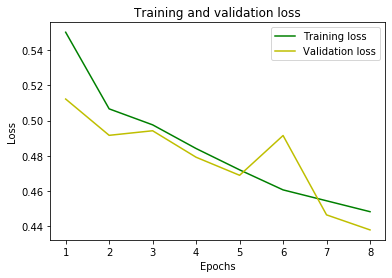

In [96]:
plt.clf()
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'y', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

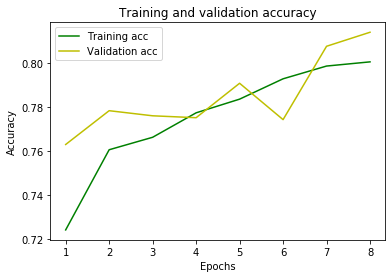

In [97]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc) + 1) #?
plt.plot(epochs, acc, 'g', label='Training acc')
plt.plot(epochs, val_acc, 'y', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

LSTM

In [98]:
# try 1 way LSTM
# Random search drop out rate and number of units/neurons
X_train = np.array(X_train)
X_test = np.array(X_test)
input_shape = (X_train.shape[1], 1)

units = 128


model = Sequential()
model.add(Reshape((50, 50), input_shape=(2500,)))
# 1 sees the past 
# 2 sees the past and the future
dropout = .19 
print('Number of hidden units: ', units, 'Dropout: ', dropout)
model.add(LSTM(units, input_shape=input_shape)) # 64, $128$, 256, 512
model.add(Dropout(dropout))
model.add(Dense(1, activation='sigmoid'))

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)
print('Training...')
history = model.fit(
    np.array(X_train),
    np.array(y_train),
    batch_size = 128, 
    epochs = 8,
    validation_split = 0.1
)

print(model.evaluate(np.array(X_test), y_test), "\n\n")

Number of hidden units:  128 Dropout:  0.19
Training...
Train on 31126 samples, validate on 3459 samples
Epoch 1/8
31126/31126 [==============================] - 109s 4ms/step - loss: 0.5414 - accuracy: 0.7357 - val_loss: 0.5608 - val_accuracy: 0.7317
Epoch 2/8
31126/31126 [==============================] - 107s 3ms/step - loss: 0.5002 - accuracy: 0.7663 - val_loss: 0.4740 - val_accuracy: 0.7939
Epoch 3/8
31126/31126 [==============================] - 106s 3ms/step - loss: 0.4843 - accuracy: 0.7810 - val_loss: 0.4877 - val_accuracy: 0.7944
Epoch 4/8
31126/31126 [==============================] - 106s 3ms/step - loss: 0.4749 - accuracy: 0.7840 - val_loss: 0.4794 - val_accuracy: 0.7852
Epoch 5/8
31126/31126 [==============================] - 106s 3ms/step - loss: 0.4647 - accuracy: 0.7910 - val_loss: 0.4423 - val_accuracy: 0.8086
Epoch 6/8
31126/31126 [==============================] - 106s 3ms/step - loss: 0.4589 - accuracy: 0.7950 - val_loss: 0.4598 - val_accuracy: 0.7979
Epoch 7/8
311

In [99]:
predictions = [i[0] for i in model.predict_classes(X_test)]

tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()

print("Sensitivity: ", str(tp/(tp+fn)), '\n')
print('Specificity:', str(tn/(tn+fp)), '\n')

Sensitivity:  0.7863833676033813 

Specificity: 0.8288056206088993 



We can plot the training and validation accuracy and loss at each epoch by using the history variable returned by the fit function.

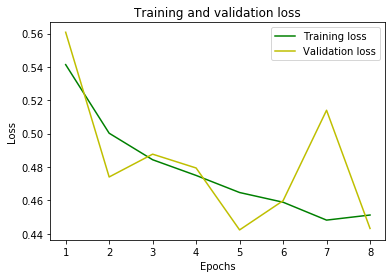

In [100]:
plt.clf()
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'y', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

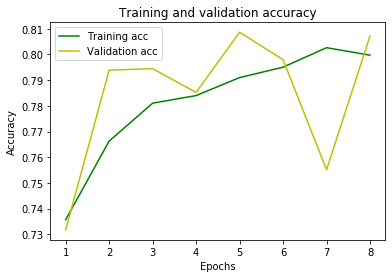

In [101]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc) + 1) #?
plt.plot(epochs, acc, 'g', label='Training acc')
plt.plot(epochs, val_acc, 'y', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

<hr/>
Classification Using SKlearn - Traditional ML Algorithms
<hr/>

In [102]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import datasets 
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from time import time

h = .02  # step size in the mesh

names = ["Random Forest", "MLP"]

classifiers = [
    RandomForestClassifier(max_depth=10, n_estimators=100),
    MLPClassifier()
]

print("{0:20}{1:40}\n-----------------------------------------------------".\
      format("Classifier", "Accuracy"))

# iterate over classifiers
for name, clf in zip(names, classifiers):
    
    start_time = time()
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    end_time = time()
    print("{0:20}{1:40}{2:40}".format(name, str(score), (end_time - start_time)))

Classifier          Accuracy                                
-----------------------------------------------------
Random Forest       0.7626922632126749                                            30.000137090682983
MLP                 0.7720596738753325                                             911.4740092754364


C:\Users\tug84786\AppData\Local\Continuum\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
